In [1]:
!git clone https://github.com/cgre-aachen/pynoddy.git

Cloning into 'pynoddy'...
remote: Enumerating objects: 4032, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 4032 (delta 20), reused 9 (delta 4), pack-reused 3996 (from 1)
Receiving objects: 100% (4032/4032), 32.74 MiB | 11.95 MiB/s, done.
Resolving deltas: 100% (2359/2359), done.


In [4]:
import sys, os
# Get the current PATH
path_variable = os.environ['PATH']

# Define the directory to add
new_directory = '/content/pynoddy/noddyapp/'
#topo_directory = '/content/pynoddy/pynoddy/topology/'

# Add the new directory to PATH, ensuring it's not already present
if new_directory not in path_variable:
    os.environ['PATH'] = f"{path_variable}:{new_directory}"

# Verify the change
print(os.environ['PATH'])

sys.path.append('pynoddy/noddyapp/')
#sys.path.append('pynoddy/pynoddy/topology/')

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/pynoddy/noddyapp/:/content/pynoddy/pynoddy/topology/


In [5]:
!noddy

Arguments <historyfile> <outputfile> <calc_mode>:
BLOCK
GEOPHYSICS
SURFACES
BLOCK_GEOPHYS
BLOCK_SURFACES
TOPOLOGY
ANOM_FROM_BLOCK
ALL


In [6]:
!pip install git+https://github.com/cgre-aachen/pynoddy.git

  Cloning https://github.com/cgre-aachen/pynoddy.git to /tmp/pip-req-build-gceo4fuo
  Running command git clone --filter=blob:none --quiet https://github.com/cgre-aachen/pynoddy.git /tmp/pip-req-build-gceo4fuo
  Resolved https://github.com/cgre-aachen/pynoddy.git to commit 4fccce906c5691543a425070cb36825ab5335ebe
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 317.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for pynoddy: filename=pynoddy-1.1-py3-none-any.whl size=115432 sha256=6bf39e71c4c0dc53b8dd4cf3f44ea90ed104cadfc355f36bc1d1357c1faee7ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-64bb0f9g/wheels/1d/c2/73/0af89a2653b0b0bc0867d8aed21ed47e73765d1edd57ffe322
Successfully built pynoddy


In [7]:
#import sys, os
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload

#pynoddy classes
import pynoddy
import pynoddy.history
import pynoddy.output

from pynoddy.history import NoddyHistory
from pynoddy.output import NoddyOutput
#from pynoddy.output import NoddyTopology

In [60]:
history_name1 = "ex1/simple_model_layeronly.his"
history_name2 = "ex1/simple_model_layerplusfault.his"
history_name3 = "ex1/simple_model.his"
output_name = "ex1/simple_out"

In [61]:
if not os.path.exists('ex1'):
    os.mkdir('ex1')

In [94]:
his = pynoddy.history.NoddyHistory()

# add stratigraphy
strati_options = {'num_layers' : 8,
                  'layer_names': ['A', 'B', 'C',
                                  'D', 'E', 'F',
                                  'G', 'H'],
                  'layer_thickness': [1500,500,500,500,500,500,500,500]}

his.add_event('stratigraphy', strati_options)

# add fault
#fault_options = {'name' : 'Fault_E',
#                 'pos' : (6000, 0, 5000),
#                 'dip_dir' : 270,
#                 'dip' : 60,
#                 'slip' : 1000}
#his.add_event('fault', fault_options)

#add unconformity
#unconf_options = {'name' :'Unconf_1',
#                  'pos' : (6000, 0, 4000),
#                  'dip_direction' : 270,
#                  'dip' : 5,
#                  'num_layers': 4,
#                  'layer_names': ['U_A', 'U-B', 'U_C', 'U_D'],
#                  'layer_thickness': [500,1000,500,1000]}
#his.add_event('unconformity', unconf_options)

#set cube size
his.change_cube_size(50)

In [95]:
#write history file
his.write_history(history_name1)

In [97]:
#run it through Noddy
print(pynoddy.compute_model(history_name1, output_name))

In [98]:
model = NoddyOutput(output_name)

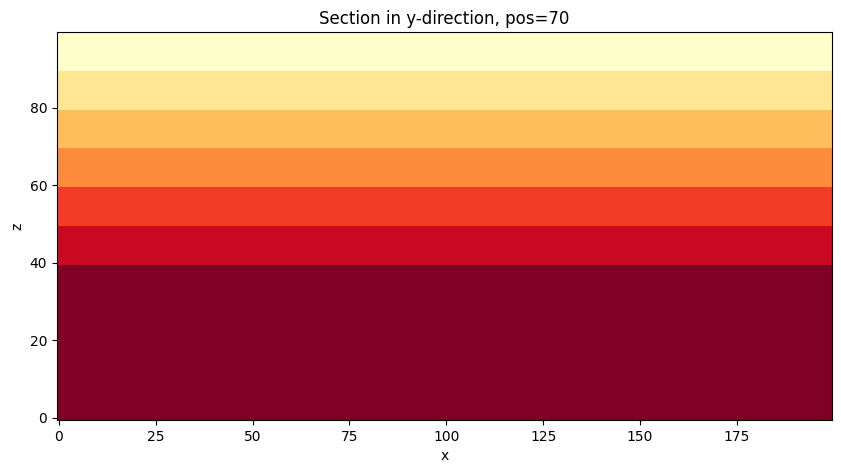

In [99]:
model.plot_section()

In [100]:
print("The model has an extent of %.0f m in x-direction, with %d cells of width %.0f m" %
      (model.extent_x, model.nx, model.delx))

The model has an extent of 10000 m in x-direction, with 200 cells of width 50 m


In [102]:
print("The model has an extent of %.0f m in z-direction, with %d cells of width %.0f m" %
      (model.extent_z, model.nz, model.delz))

The model has an extent of 5000 m in z-direction, with 100 cells of width 50 m


In [103]:
model.rock_names

['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']

In [104]:
vel = model.block.T[::-1,:,:]

In [105]:
midSection = vel[:,70,:]

In [110]:
midSection[:10,:10]

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [111]:
midSection[-10:,:10]

array([[8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.]])

In [107]:
his = pynoddy.history.NoddyHistory()

# add stratigraphy
strati_options = {'num_layers' : 8,
                  'layer_names': ['A', 'B', 'C',
                                  'D', 'E', 'F',
                                  'G', 'H'],
                  'layer_thickness': [1500,500,500,500,500,500,500,500]}

his.add_event('stratigraphy', strati_options)

# add fault
fault_options = {'name' : 'Fault_E',
                 'pos' : (6000, 0, 5000),
                 'dip_dir' : 270,
                 'dip' : 60,
                 'slip' : 1000}
his.add_event('fault', fault_options)

#add unconformity
#unconf_options = {'name' :'Unconf_1',
#                  'pos' : (6000, 0, 4000),
#                  'dip_direction' : 270,
#                  'dip' : 5,
#                  'num_layers': 4,
#                  'layer_names': ['U_A', 'U-B', 'U_C', 'U_D'],
#                  'layer_thickness': [500,1000,500,1000]}
#his.add_event('unconformity', unconf_options)

#set cube size
his.change_cube_size(50)

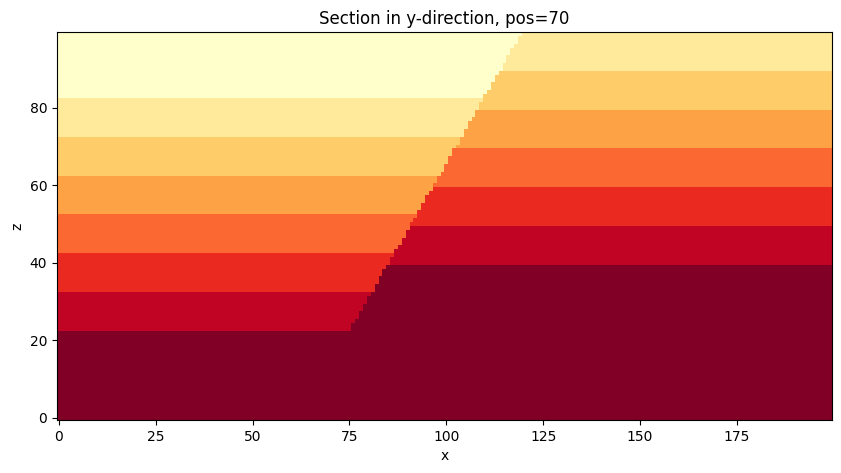

In [108]:
#write history file
his.write_history(history_name2)
#run it through Noddy
print(pynoddy.compute_model(history_name2, output_name, sim_type='TOPOLOGY'))
model = NoddyOutput(output_name)
model.plot_section()

In [109]:
model.rock_names

['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']

In [112]:
vel = model.block.T[::-1,:,:]

In [113]:
midSection = vel[:,70,:]

In [116]:
midSection[:20,:10]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [117]:
midSection[-25:,:10]

array([[7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 

In [118]:
his = pynoddy.history.NoddyHistory()

# add stratigraphy
strati_options = {'num_layers' : 8,
                  'layer_names': ['A', 'B', 'C',
                                  'D', 'E', 'F',
                                  'G', 'H'],
                  'layer_thickness': [1500,500,500,500,500,500,500,500]}

his.add_event('stratigraphy', strati_options)

# add fault
fault_options = {'name' : 'Fault_E',
                 'pos' : (6000, 0, 5000),
                 'dip_dir' : 270,
                 'dip' : 60,
                 'slip' : 1000}
his.add_event('fault', fault_options)

#add unconformity
unconf_options = {'name' :'Unconf_1',
                  'pos' : (6000, 0, 4000),
                  'dip_direction' : 270,
                  'dip' : 5,
                  'num_layers': 4,
                  'layer_names': ['U_A', 'U-B', 'U_C', 'U_D'],
                  'layer_thickness': [500,1000,500,1000]}
his.add_event('unconformity', unconf_options)

#set cube size
his.change_cube_size(50)

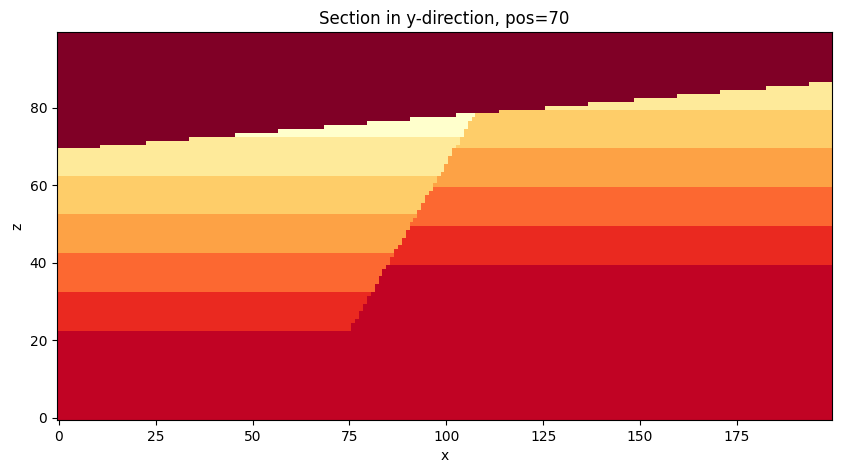

In [120]:
#write history file
his.write_history(history_name3)
#run it through Noddy
print(pynoddy.compute_model(history_name3, output_name, sim_type='TOPOLOGY'))
model = NoddyOutput(output_name)
model.plot_section()

In [121]:
model.rock_names

['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'U_D', 'U_C', 'U-B', 'U_A']

In [19]:
#from 2D structure to velocity model

In [122]:
vel = model.block.T[::-1,:,:]

In [123]:
vel.shape

(100, 140, 200)

In [124]:
midSection = vel[:,70,:]

In [129]:
midSection[:32,:10]

array([[9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 

In [127]:
midSection[-25:,:10]

array([[7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [8., 8., 8., 

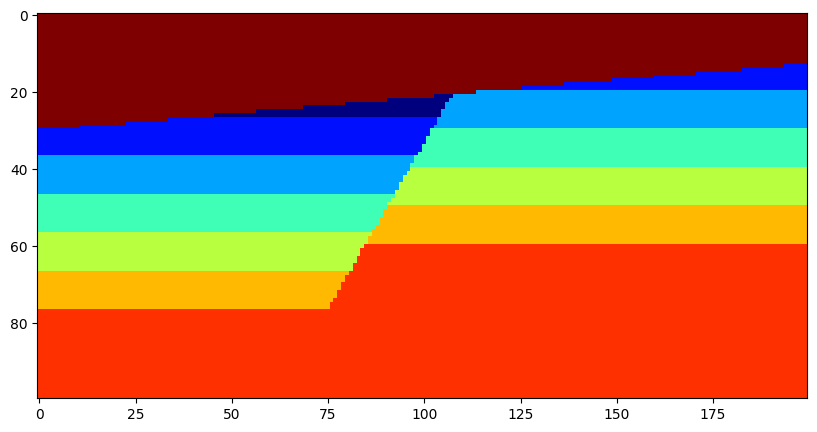

In [125]:
fig,axes = plt.subplots(1,1,figsize=[10,5])
axes.imshow(midSection,cmap='jet')
#axes.invert_yaxis()
plt.show()

In [41]:
model.rock_names

['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'U_D', 'U_C', 'U-B', 'U_A']

In [153]:
#min,max velocity values for different lithology
'''
sandstone_velocity = (2300,3500)
shale_velocity=(2000,3500)
siltstone_velocity=((2300+2000)/2,3500)
limestone_velocity = (4000,5000)
water_velocity=(1500,1500)
'''

'\nsandstone_velocity = (2300,3500)\nshale_velocity=(2000,3500)\nsiltstone_velocity=((2300+2000)/2,3500)\nlimestone_velocity = (4000,5000)\nwater_velocity=(1500,1500)\n'

In [130]:
#replace the lithology with values

In [154]:
midSection[midSection==9.0]=1800.0 #lith 9
midSection[midSection==2.0]=2000 #lith 2
midSection[midSection==3.0]=2500 #lith 3
midSection[midSection==4.0]=3000 #lith 4
midSection[midSection==5.0]=3200 #lith 5
midSection[midSection==6.0]=3500 #lith 6
midSection[midSection==7.0]=4000 #lith 7
midSection[midSection==8.0]=4800 #lith 8

In [155]:
min(midSection.flatten())

np.float64(2000.0)

In [156]:
max(midSection.flatten())

np.float64(4800.0)

In [165]:
!pip install pylops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.5/316.5 kB 6.1 MB/s eta 0:00:00


In [169]:
from scipy.signal import filtfilt
import pylops
from pylops.utils.wavelets import ricker
import numpy as np

(np.float64(0.0), np.float64(0.4), np.float64(0.164), np.float64(-0.164))

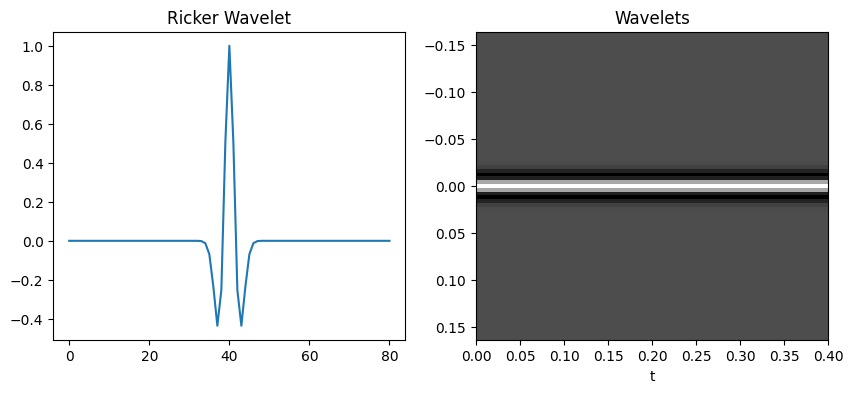

In [212]:
# wavelet
ntwav = 41
nt0=101
dt0=0.004
t0=np.arange(nt0)*dt0

f0s = np.flip(np.arange(nt0) * 0.1 + 5)
wavs = np.array([ricker(t0[:ntwav], 35)[0] for f0 in f0s])
wavc = np.argmax(wavs[0])

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(wavs[0])
plt.title("Ricker Wavelet")
plt.subplot(1,2,2)
plt.imshow(wavs.T, cmap="gray", extent=(t0[0], t0[-1], t0[ntwav], -t0[ntwav]))
plt.xlabel("t")
plt.title("Wavelets")
plt.axis("tight")


In [200]:
nz,nx=midSection.shape
print([nz,nx])

[100, 200]


In [194]:
vmodel=np.zeros([nz+1,nx+1])
vmodel[:nz,:nx]=midSection
vmodel[:nz,nx]=midSection[:,nx-1]
vmodel[nz,:]=vmodel[nz-1,:]

In [213]:
# operator
PPop = pylops.avo.poststack.PoststackLinearModelling(wavs / 2, nt0=nt0, explicit=True)
print(PPop.shape)
m = np.log(vmodel)
# data
d = PPop * m

(101, 101)


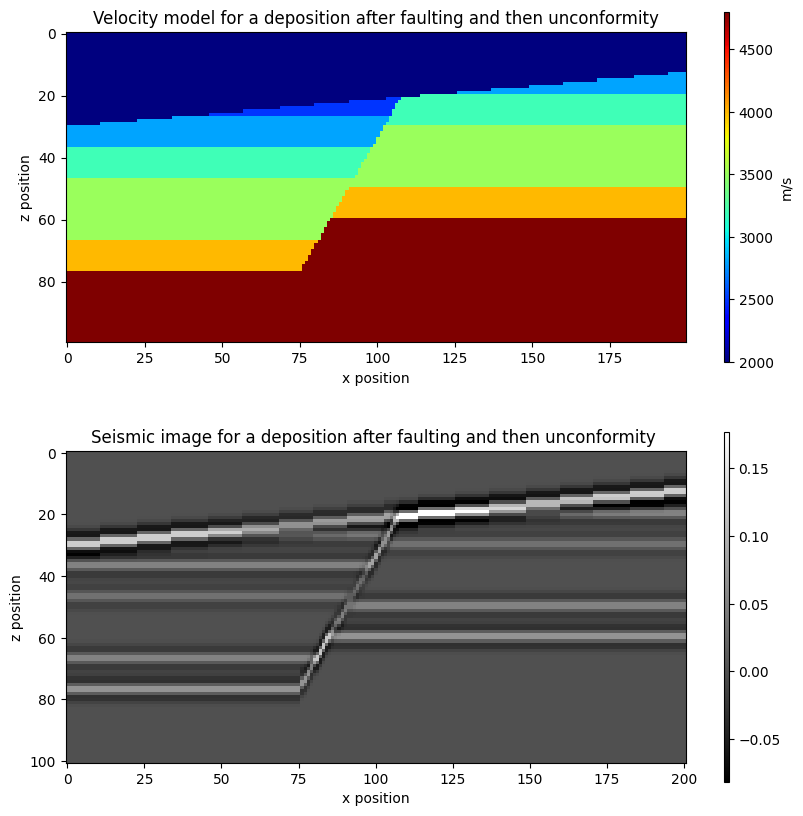

In [222]:
plt.subplots(2,1,figsize=[10,10])
plt.subplot(2,1,1)
plt.imshow(midSection,cmap='jet')
plt.title('Velocity model for a deposition after faulting and then unconformity')
plt.xlabel('x position')
plt.ylabel('z position')
plt.colorbar(orientation='vertical', label="m/s",aspect=80)
#axes.invert_yaxis()
#axe1.grid()
plt.subplot(2,1,2)
plt.imshow(d, cmap='gray')
plt.title('Seismic image for a deposition after faulting and then unconformity ')
plt.xlabel('x position')
plt.ylabel('z position')
plt.colorbar(orientation='vertical',aspect=80)
plt.show()